In [2]:
import missingno as msno
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### 1. 'missingno'
- 데이터 분석 및 전처리에서 누락된 데이터를 시각화하고 분석하는 데 사용된다.
- Pandas 데이터프레임을 입력으로 받아 누락된 데이터를 여러 가지 형태로 시각화하여 누락된 데이터 패턴을 쉽게 파악할 수 있다.

### 2. 'sklearn.experimental.enable_iterative_imputer'
- 사이킷런(Scikit-Learn)에서 실험적 기능을 활성화하기 위한 모듈

### 3. 'sklearn.impute.IterativeImputer'
- 데이터 전처리 도구 중 하나로, 누락된 데이터를 반복적인 알고리즘을 사용하여 추정하는 데 사용

In [2]:
df = pd.read_csv("bike_sharing_daily.csv")

In [3]:
# 각 열 또는 행에서 결측치의 개수를 반환한다.
df.isna().sum()

instant        0
dteday         0
season         0
yr             0
mnth           0
holiday        0
weekday        0
workingday     0
weathersit     0
temp          17
atemp         24
hum           25
windspeed     13
casual        11
registered    11
cnt            0
dtype: int64

<Axes: >

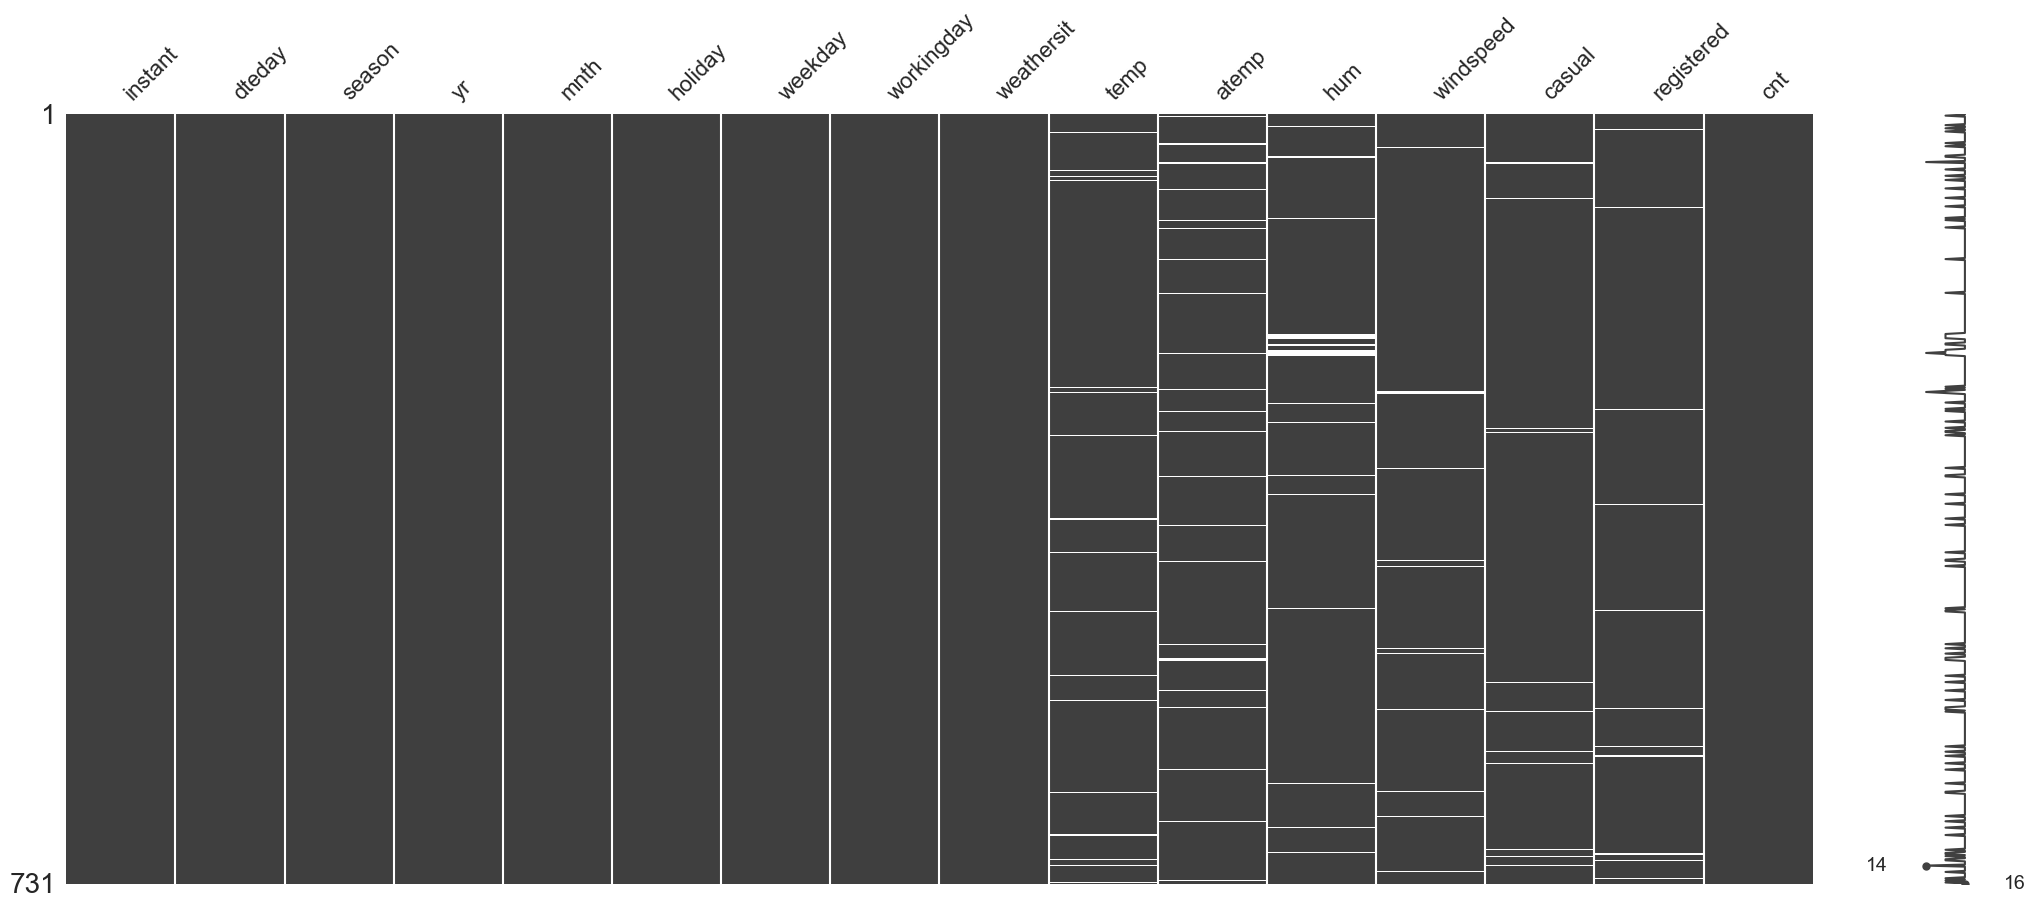

In [4]:
# 데이터프레임의 결측치 상태를 "행렬" 형태로 보여준다.
msno.matrix(df)

<Axes: >

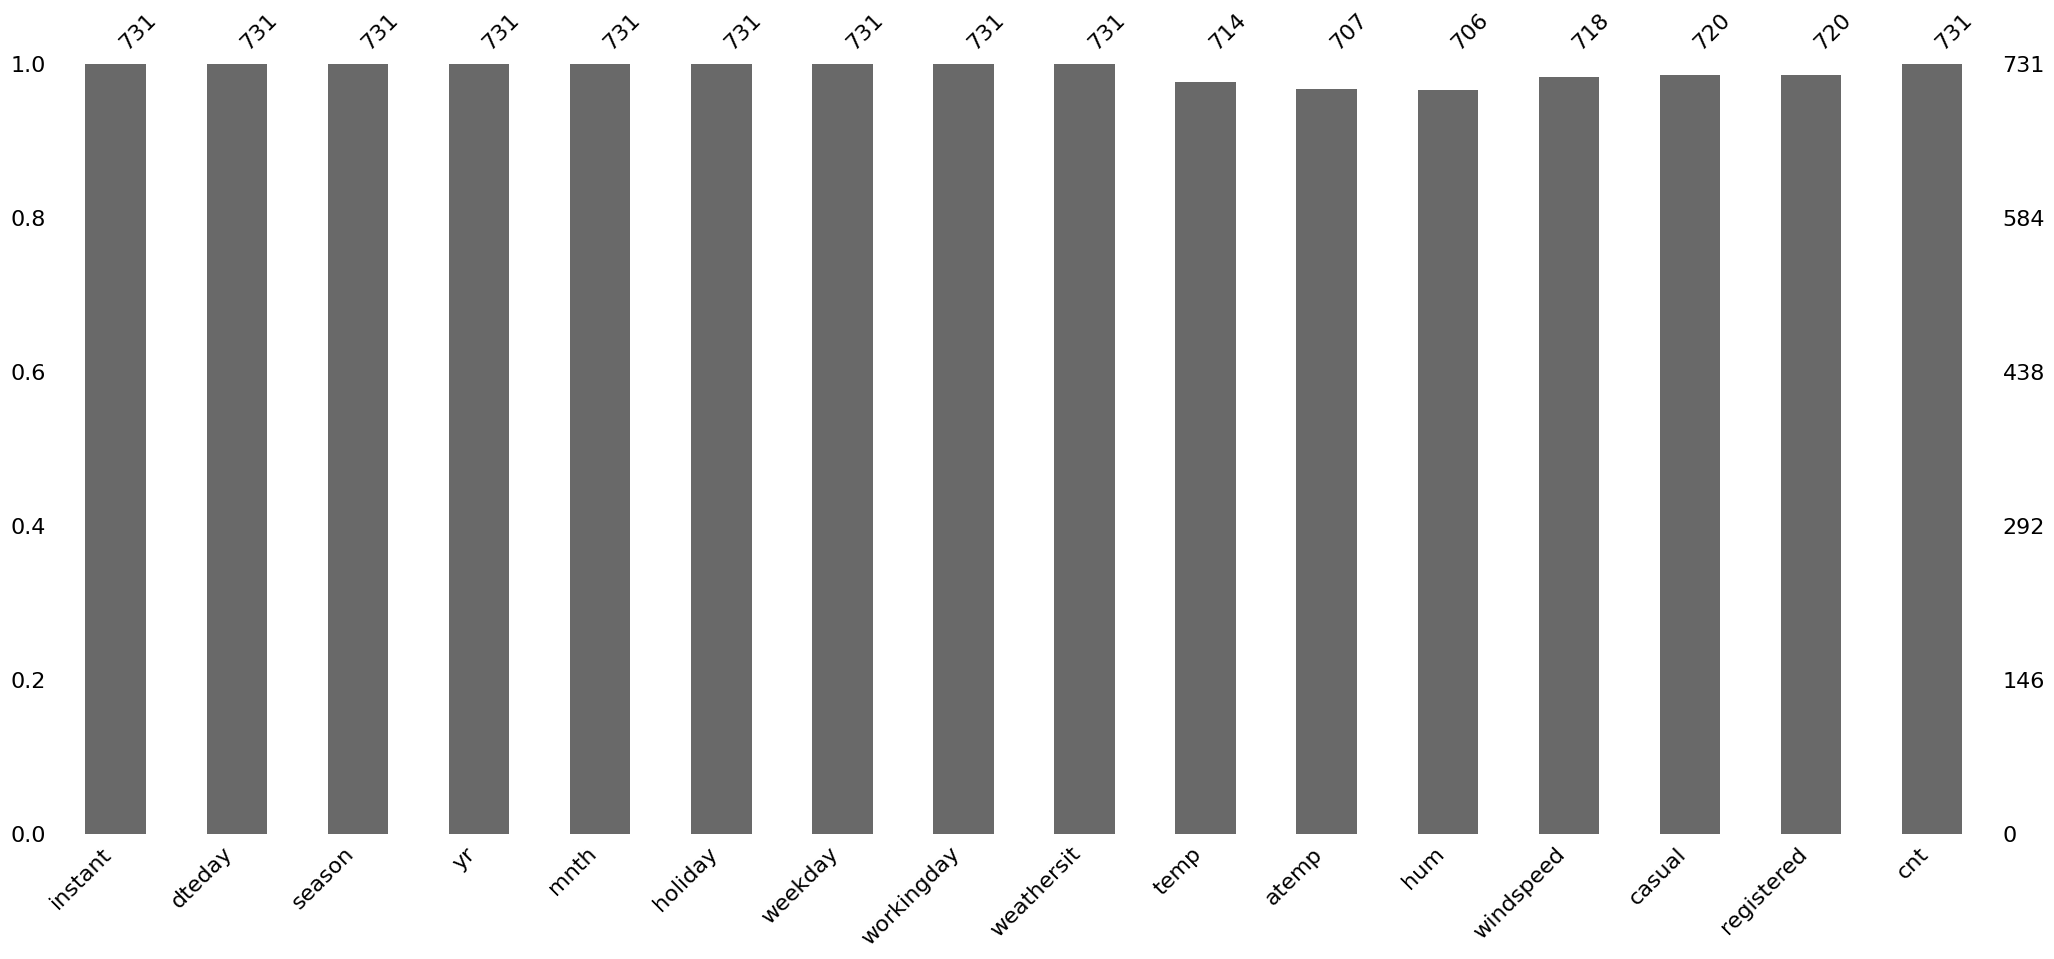

In [5]:
# 데이터프레임의 각 열에서 결측치가 얼마나 존재하는지 바(bar) 그래프로 시각화
# 전체 행의 개수에서 결측치 개수를 뺀 만큼 그래프로 표시된다.
msno.bar(df)

### dropna() 메서드

In [6]:
# dropna() : 행을 기준으로 어떤한 열에 결측값이 있다면 그 행을 삭제한다.
df.dropna()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331.0,654.0,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131.0,670.0,801
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108.0,1454.0,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82.0,1518.0,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88.0,1518.0,1606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,724,2012-12-24,1,1,12,0,1,1,2,0.231304,0.258900,0.791304,0.077230,174.0,746.0,920
724,725,2012-12-25,1,1,12,1,2,0,2,0.291304,0.294465,0.734783,0.168726,440.0,573.0,1013
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247.0,1867.0,2114
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159.0,1182.0,1341


In [7]:
# dropna(how='all') : 행을 기준으로 모든 열이 다 결측값을 가지고 있다면 그 행을 삭제한다.
df.dropna(how='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331.0,654.0,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131.0,670.0,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,NaN,0.437273,0.248309,120.0,1229.0,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108.0,1454.0,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82.0,1518.0,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247.0,1867.0,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,NaN,0.590000,0.155471,644.0,2451.0,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159.0,1182.0,1341
729,730,2012-12-30,1,1,12,0,0,0,1,NaN,0.231700,0.483333,0.350754,364.0,1432.0,1796


In [8]:
# dropna(how='any') : 헹을 기준으로 하나의 열이라도 결측값이 있다면 그 행을 삭제한다.
df.dropna(how='any')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331.0,654.0,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131.0,670.0,801
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108.0,1454.0,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82.0,1518.0,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88.0,1518.0,1606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,724,2012-12-24,1,1,12,0,1,1,2,0.231304,0.258900,0.791304,0.077230,174.0,746.0,920
724,725,2012-12-25,1,1,12,1,2,0,2,0.291304,0.294465,0.734783,0.168726,440.0,573.0,1013
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247.0,1867.0,2114
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159.0,1182.0,1341


In [9]:
# dropna(thresh=n) : 행을 기준으로 최소 n개의 비결측값이 있다면 그 행을 유지하고 아니라면 삭제한다.
df.dropna(thresh=1)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331.0,654.0,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131.0,670.0,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,NaN,0.437273,0.248309,120.0,1229.0,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108.0,1454.0,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82.0,1518.0,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247.0,1867.0,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,NaN,0.590000,0.155471,644.0,2451.0,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159.0,1182.0,1341
729,730,2012-12-30,1,1,12,0,0,0,1,NaN,0.231700,0.483333,0.350754,364.0,1432.0,1796


In [13]:
# dropna(subset = ['column name']) : 'column name' 열에 결측치가 있는 행을 제거한다.
df.dropna(subset = ['hum'])

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331.0,654.0,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131.0,670.0,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,NaN,0.437273,0.248309,120.0,1229.0,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108.0,1454.0,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82.0,1518.0,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247.0,1867.0,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,NaN,0.590000,0.155471,644.0,2451.0,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159.0,1182.0,1341
729,730,2012-12-30,1,1,12,0,0,0,1,NaN,0.231700,0.483333,0.350754,364.0,1432.0,1796


### fillna()

In [11]:
# fillna(n) : n값으로 결측치를 대체한다.
df.fillna(0)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331.0,654.0,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131.0,670.0,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.000000,0.437273,0.248309,120.0,1229.0,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108.0,1454.0,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82.0,1518.0,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247.0,1867.0,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.000000,0.590000,0.155471,644.0,2451.0,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159.0,1182.0,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.000000,0.231700,0.483333,0.350754,364.0,1432.0,1796


In [12]:
df.fillna('0')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331.0,654.0,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131.0,670.0,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0,0.437273,0.248309,120.0,1229.0,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.2,0.212122,0.590435,0.160296,108.0,1454.0,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.22927,0.436957,0.1869,82.0,1518.0,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247.0,1867.0,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0,0.59,0.155471,644.0,2451.0,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.2424,0.752917,0.124383,159.0,1182.0,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0,0.2317,0.483333,0.350754,364.0,1432.0,1796


In [14]:
# 특정 열을 지정하여서 결측값을 대체할 수 있다.
df.fillna({'hum':0})

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331.0,654.0,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131.0,670.0,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,NaN,0.437273,0.248309,120.0,1229.0,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108.0,1454.0,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82.0,1518.0,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247.0,1867.0,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,NaN,0.590000,0.155471,644.0,2451.0,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159.0,1182.0,1341
729,730,2012-12-30,1,1,12,0,0,0,1,NaN,0.231700,0.483333,0.350754,364.0,1432.0,1796


In [16]:
# 변수화 해서도 가능하다.
df.fillna(df.atemp.var())

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331.0,654.0,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131.0,670.0,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.026516,0.437273,0.248309,120.0,1229.0,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108.0,1454.0,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82.0,1518.0,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247.0,1867.0,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.026516,0.590000,0.155471,644.0,2451.0,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159.0,1182.0,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.026516,0.231700,0.483333,0.350754,364.0,1432.0,1796


In [17]:
# numpy와 조합도 가능하다
df.fillna(np.var(df.hum))

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331.0,654.0,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131.0,670.0,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.020321,0.437273,0.248309,120.0,1229.0,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108.0,1454.0,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82.0,1518.0,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247.0,1867.0,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.020321,0.590000,0.155471,644.0,2451.0,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159.0,1182.0,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.020321,0.231700,0.483333,0.350754,364.0,1432.0,1796


### 보간 : 두 점을 연결하는 방법

In [19]:
# 보간법
# fillna(method='pad') : 결측치가 발견되었을 때 앞의 행 번째의 동일한 열의 값으로 대체한다. 없는 경우에는 결측치로 남아있다.
df.fillna(method='pad')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331.0,654.0,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131.0,670.0,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.353739,0.437273,0.248309,120.0,1229.0,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108.0,1454.0,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82.0,1518.0,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247.0,1867.0,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.226642,0.590000,0.155471,644.0,2451.0,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159.0,1182.0,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.253333,0.231700,0.483333,0.350754,364.0,1432.0,1796


In [20]:
# fillna(method='bfill') : 결측치가 발견되었을 때 뒤의 행 번째의 동일한 열의 값으로 대체한다. 없는 경우에는 결측치로 남아있다.
df.fillna(method='bfill')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331.0,654.0,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131.0,670.0,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.212122,0.437273,0.248309,120.0,1229.0,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108.0,1454.0,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82.0,1518.0,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247.0,1867.0,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.242400,0.590000,0.155471,644.0,2451.0,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159.0,1182.0,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.215833,0.231700,0.483333,0.350754,364.0,1432.0,1796


In [23]:
# interpolate() <-> interpolate() : 선형으로 비례하여 결측값을 보간
# ex code
dfv = pd.DataFrame({
    'A': [1, np.nan, np.nan, 10]
})

dfv.interpolate()

,A
0,1.0
1,4.0
2,7.0
3,10.0


In [25]:
df.interpolate()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331.0,654.0,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131.0,670.0,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.282931,0.437273,0.248309,120.0,1229.0,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108.0,1454.0,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82.0,1518.0,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247.0,1867.0,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.234521,0.590000,0.155471,644.0,2451.0,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159.0,1182.0,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.234583,0.231700,0.483333,0.350754,364.0,1432.0,1796


In [26]:
# 시간에 따른 보간을 하기 위해 시계열 데이터로 인덱스르 지정해야 한다.
df_sp = df[['dteday', 'atemp']]

In [27]:
# dteday 열의 경우 Object 문자로 잡힌 상태이며, 아직 시계열데이터인 상태가 아니다.
df_sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   dteday  731 non-null    object 
 1   atemp   707 non-null    float64
dtypes: float64(1), object(1)
memory usage: 11.6+ KB


In [29]:
# 시계열 데이터로 만들기 위해서는 pd.to_datatime() 메서드를 사용한다.
df_sp['dteday'] = pd.to_datetime(df_sp['dteday'])

/var/folders/fs/789w_bnn3h1crkt1ffyqbv700000gn/T/ipykernel_2803/2436268529.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sp['dteday'] = pd.to_datetime(df_sp['dteday'])


In [30]:
# 시계열 데이터로 전환이 잘 되었음을 확인할 수 있다.
df_sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   dteday  731 non-null    datetime64[ns]
 1   atemp   707 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 11.6 KB


In [31]:
# 인덱스로 지정해줘야 한다.
df_sp = df_sp.set_index('dteday')

In [32]:
# 시계열의 데이터의 경우 interpolate(method='time')을 사용하여 보간할 수 있다.
df_sp.interpolate(method='time')

,atemp
dteday,
2011-01-01,0.363625
2011-01-02,0.353739
2011-01-03,0.282931
2011-01-04,0.212122
2011-01-05,0.229270
...,...
2012-12-27,0.226642
2012-12-28,0.234521
2012-12-29,0.242400


### 다양한 보간법을 통하여 결측값을 대체하고 난 후 회귀분석을 통해 평가를 해보자!

In [33]:
# mpg 데이터 불러오기!
import seaborn as sns
mpg = sns.load_dataset('mpg')

In [34]:
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [35]:
# 결측값은 6개이다.
mpg.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [36]:
# 6개 결측치를 삭제해주자.
mpg = mpg.dropna()

In [37]:
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [38]:
# 실린더, 배기량, 마력, 무게 등에 따른 mpg 차량의 연비를 예측하려고 해보자.
df_x = mpg[['cylinders', 'displacement', 'horsepower', 'weight']]

In [39]:
# 결측치를 만들자
mrr = np.random.randint(0, 392, size=20) # 랜덤하게 결측치를 만들 값 지정

In [40]:
df_x.iloc[mrr] = np.nan

In [43]:
df_x

,cylinders,displacement,horsepower,weight
0,8.0,307.0,130.0,3504.0
1,8.0,350.0,165.0,3693.0
2,8.0,318.0,150.0,3436.0
3,8.0,304.0,150.0,3433.0
4,8.0,302.0,140.0,3449.0
...,...,...,...,...
393,4.0,140.0,86.0,2790.0
394,4.0,97.0,52.0,2130.0
395,4.0,135.0,84.0,2295.0
396,4.0,120.0,79.0,2625.0


In [41]:
df_x.isna().sum()

cylinders       20
displacement    20
horsepower      20
weight          20
dtype: int64

In [55]:
#다양한 결측치를 사용해 보려고 샘플 데이터 만들기
df_sp = pd.concat([df_x, mpg['mpg']],axis=1)
df_sp1 = pd.concat([df_x, mpg['mpg']],axis=1)

### 평균으로 대치하기

In [45]:
#단순하게 평균으로 대치
df_x.cylinders.mean()
df_x.displacement.mean()
df_x.horsepower.mean()
df_x.weight.mean()

2979.1639784946237

In [46]:
#df_sp은 단순 평균으로 대치
df_sp['cylinders']=df_sp['cylinders'].fillna(df_x.cylinders.mean())
df_sp['displacement']=df_sp['displacement'].fillna(df_x.displacement.mean())
df_sp['horsepower']=df_sp['horsepower'].fillna(df_x.horsepower.mean())
df_sp['weight']=df_sp['weight'].fillna(df_x.weight.mean())

In [47]:
df_sp.isna().sum()

cylinders       0
displacement    0
horsepower      0
weight          0
mpg             0
dtype: int64

In [48]:
## 학습을 하기 위해 train_test_split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test =train_test_split(df_sp.drop('mpg',axis=1), df_sp['mpg'], test_size=0.3, random_state=111)

In [49]:
import statsmodels.api as sm

In [50]:
fit_train1 = sm.OLS(y_train, x_train) #회귀분석 진행

In [51]:
fit_train1 = fit_train1.fit() #회귀분석 모델 만들기

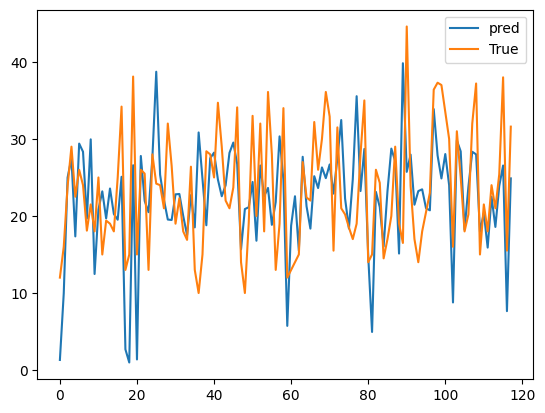

In [52]:
#실제값과 예측값을 통해 간단한 시각화 비교
plt.plot(np.array(fit_train1.predict(x_test)),label ='pred')
plt.plot(np.array(y_test),label ='True')
plt.legend()

In [53]:
#mse
from sklearn.metrics import mean_squared_error

#평균으로 대치했을 때 나온 mse값 
mse1 = mean_squared_error(y_true = y_test, y_pred = fit_train1.predict(x_test))
print(mse1)

54.92047688173498


### (method='pad') 보간법으로 대치하기

In [54]:
df_sp1.isna().sum()

cylinders       20
displacement    20
horsepower      20
weight          20
mpg              0
dtype: int64

In [56]:
#df_sp은 0으로 대치
df_sp1['cylinders']=df_sp1['cylinders'].fillna(method='pad')
df_sp1['displacement']=df_sp1['displacement'].fillna(method='pad')
df_sp1['horsepower']=df_sp1['horsepower'].fillna(method='pad')
df_sp1['weight']=df_sp1['weight'].fillna(method='pad')

In [57]:
df_sp1

,cylinders,displacement,horsepower,weight,mpg
0,8.0,307.0,130.0,3504.0,18.0
1,8.0,350.0,165.0,3693.0,15.0
2,8.0,318.0,150.0,3436.0,18.0
3,8.0,304.0,150.0,3433.0,16.0
4,8.0,302.0,140.0,3449.0,17.0
...,...,...,...,...,...
393,4.0,140.0,86.0,2790.0,27.0
394,4.0,97.0,52.0,2130.0,44.0
395,4.0,135.0,84.0,2295.0,32.0
396,4.0,120.0,79.0,2625.0,28.0


In [58]:
x_train, x_test, y_train, y_test =train_test_split(df_sp1.drop('mpg',axis=1), df_sp1['mpg'], test_size=0.3, random_state=111)

In [59]:
fit_train2 = sm.OLS(y_train, x_train) #회귀분석 진행

In [60]:
fit_train2 = fit_train2.fit() #회귀분석 모델 만들기

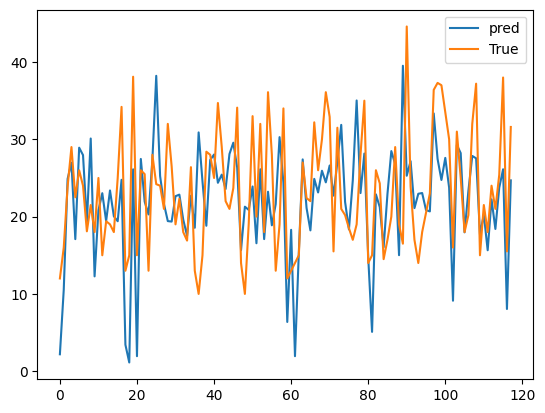

In [61]:
#실제값과 예측값을 통해 간단한 시각화 비교
plt.plot(np.array(fit_train2.predict(x_test)),label ='pred')
plt.plot(np.array(y_test),label ='True')
plt.legend()

In [62]:
#mse
from sklearn.metrics import mean_squared_error

#0으로 대치했을 때 나온 mse값 
mse2 = mean_squared_error(y_true = y_test, y_pred = fit_train2.predict(x_test))
print(mse2)

54.95254414050862
